In [12]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.stats import chi2_contingency

# <font color=pink> Data Preparation

In [13]:
#Importing dataset
CustomerData = pd.read_csv('CustmPersonalityData.csv')
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
#Dropping duplicates
CustomerData = CustomerData.drop_duplicates()

In [16]:
#Checking if any duplicate values were dropped(No duplicates)
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
#Separating the response variable into a different dataframe
Response = pd.DataFrame(CustomerData["Response"])
Response.head()

,Response
0,1
1,0
2,0
3,0
4,0


In [18]:
#Converting Dt_Customer to just the year
CustomerData['Dt_Customer'] = 2023 - pd.to_datetime(CustomerData['Dt_Customer'], format='%d/%m/%Y').dt.year
CustomerData = CustomerData.rename(columns={'Dt_Customer': 'DurationJoined'})
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,11,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,9,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,10,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,9,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,9,94,173,...,5,0,0,0,0,0,0,3,11,0


### <font color = pink> Creating DataFrame of only numerical data
    Dropping variables that are categorical + those that we want to convert from numerical to categorical(Kidhome, Teenhome)

In [19]:
NumericalCustomerData = CustomerData.select_dtypes(include=['int64', 'float64'])
NumericalCustomerData = NumericalCustomerData.drop(['Z_CostContact', 'Z_Revenue', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'ID', 'Recency', 'Response'], axis=1)

In [20]:
NumericalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   DurationJoined       2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

### <font color = pink> Creating DataFrame for categorical data 

In [21]:
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]])
CategoricalCustomerData.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Graduation,Single,0,0,0,0,0,0
1,Graduation,Single,0,0,0,0,0,0
2,Graduation,Together,0,0,0,0,0,0
3,Graduation,Together,0,0,0,0,0,0
4,PhD,Married,0,0,0,0,0,0


In [22]:
CategoricalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2240 non-null   object
 1   Marital_Status  2240 non-null   object
 2   Complain        2240 non-null   int64 
 3   AcceptedCmp1    2240 non-null   int64 
 4   AcceptedCmp2    2240 non-null   int64 
 5   AcceptedCmp3    2240 non-null   int64 
 6   AcceptedCmp4    2240 non-null   int64 
 7   AcceptedCmp5    2240 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.5+ KB


In [23]:
#Checking the unique categories in each categorical variable that are not 0 and 1 
print("The different categories for Education are:", end=" ")
print(pd.unique(CustomerData["Education"]))
print(CustomerData['Education'].value_counts())
print("")
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CustomerData["Marital_Status"]))
print(CustomerData['Marital_Status'].value_counts())
print("")

The different categories for Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [24]:
#Dropping miscellaneous values for Marital_Status
CategoricalCustomerData = CategoricalCustomerData[CategoricalCustomerData['Marital_Status'] != 'YOLO']
CategoricalCustomerData = CategoricalCustomerData[CategoricalCustomerData['Marital_Status'] != 'Absurd']

In [25]:
#Combining the Alone and Single categories for Marital_Status since they have the same meaning 
CategoricalCustomerData['Marital_Status'] = CategoricalCustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')

In [26]:
#Checking if combination is successful 
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CategoricalCustomerData["Marital_Status"]))
print(CategoricalCustomerData['Marital_Status'].value_counts())

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow']
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


In [27]:
#Checking final number of datapoints for categorical dataframe 
CategoricalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2236 non-null   object
 1   Marital_Status  2236 non-null   object
 2   Complain        2236 non-null   int64 
 3   AcceptedCmp1    2236 non-null   int64 
 4   AcceptedCmp2    2236 non-null   int64 
 5   AcceptedCmp3    2236 non-null   int64 
 6   AcceptedCmp4    2236 non-null   int64 
 7   AcceptedCmp5    2236 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.2+ KB


### <font color = pink> Editing CustomerData dataframe to drop miscellaneous values for marital status
    

In [28]:
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'YOLO']
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'Absurd']

In [29]:
CustomerData['Marital_Status'] = CustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')

In [30]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   DurationJoined       2236 non-null   int64  
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

In [31]:
CustomerData=CustomerData.dropna()

In [32]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   DurationJoined       2212 non-null   int64  
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

# <font color=pink> Exploratory Data Analysis

### <font color = pink> Numerical type
    

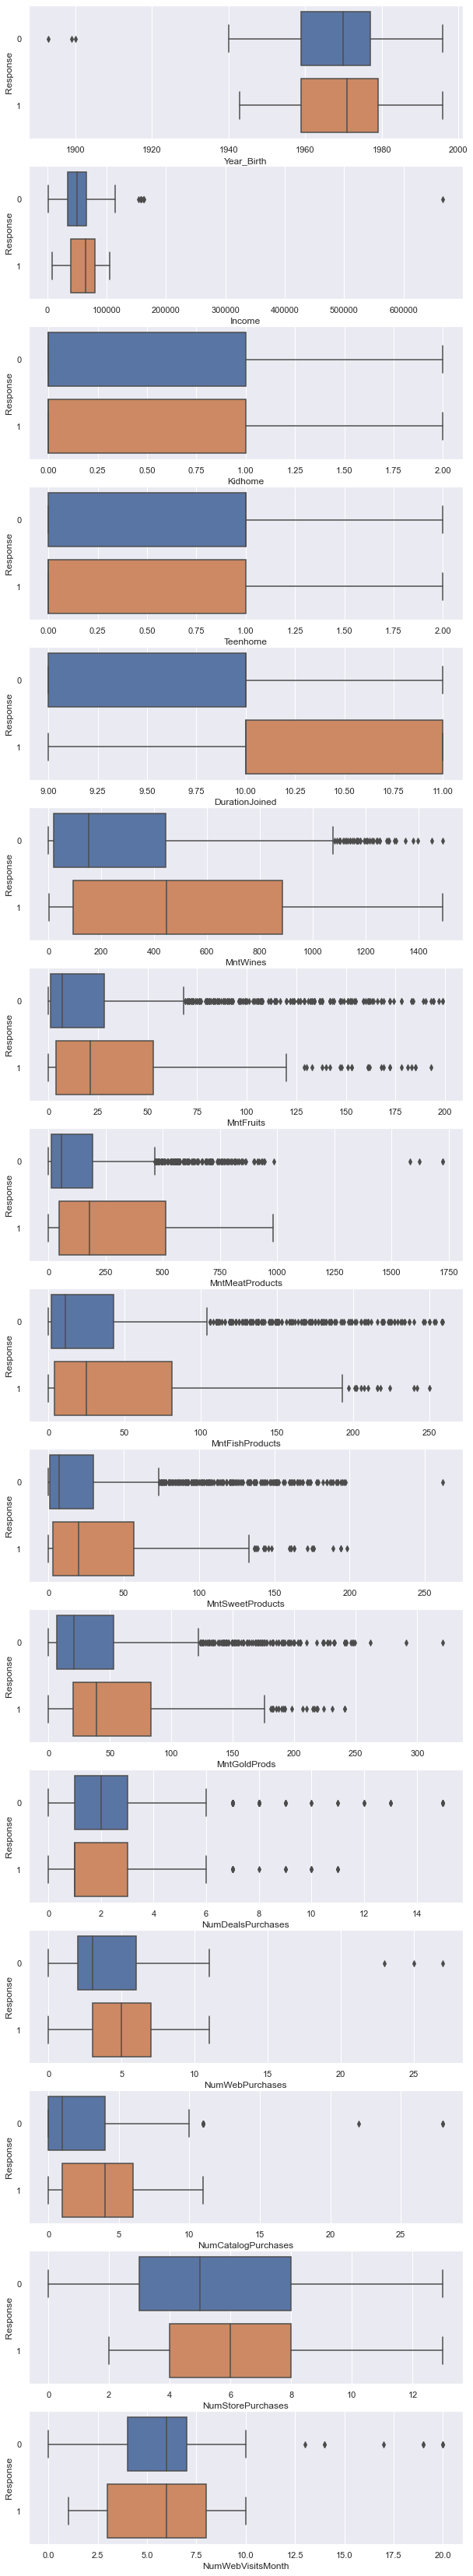

In [33]:
# Draw the distributions of all variables
f, axes = plt.subplots(16,1, figsize=(10, 60))
ConcatDF = pd.concat([NumericalCustomerData, Response], axis = 1).reindex(NumericalCustomerData.index)

count = 0
for var in NumericalCustomerData:
    sb.boxplot(x = ConcatDF[var], y = "Response", data = CustomerData, orient = "h",ax = axes[count])
    count += 1

Observations made:
1. Year_Birth has close to no relation with response as median is very similar 
2. Kidhome, Teenhome and DurationJoined have no distinct medians. Thus, upon doing further exploratory analysis, we found that these 3 variables take 3 discrete values as shown in the next block of code. 

In [34]:
print("The different categories for Kidhome are:", end=" ")
print(pd.unique(CustomerData["Kidhome"]))
print(CustomerData['Kidhome'].value_counts())
print("")
print("The different categories for Teenhome are:", end=" ")
print(pd.unique(CustomerData["Teenhome"]))
print(CustomerData['Teenhome'].value_counts())
print("")
print("The different categories for DurationJoined are:", end=" ")
print(pd.unique(CustomerData["DurationJoined"]))
print(CustomerData['DurationJoined'].value_counts())
print("")

The different categories for Kidhome are: [0 1 2]
0    1279
1     887
2      46
Name: Kidhome, dtype: int64

The different categories for Teenhome are: [0 1 2]
0    1145
1    1016
2      51
Name: Teenhome, dtype: int64

The different categories for DurationJoined are: [11  9 10]
10    1173
9      552
11     487
Name: DurationJoined, dtype: int64



Thus,  Kidhome, Teenhome and DurationJoined can be converted into categorical data as they only take 3 discrete values.

In [35]:
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Kidhome", "Teenhome", "DurationJoined"]])
CategoricalCustomerData.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Kidhome,Teenhome,DurationJoined
0,Graduation,Single,0,0,0,0,0,0,0,0,11
1,Graduation,Single,0,0,0,0,0,0,1,1,9
2,Graduation,Together,0,0,0,0,0,0,0,0,10
3,Graduation,Together,0,0,0,0,0,0,1,0,9
4,PhD,Married,0,0,0,0,0,0,1,0,9


## <font color = pink> Categorical type
    Based on EDA of categorical data, whether or not a customer lodged a complained in the last 2 years does not have a large relation on whether they participated in the latest campaign. Therefore, we will drop the 'complain' variable and not use it for our machine learning models. 

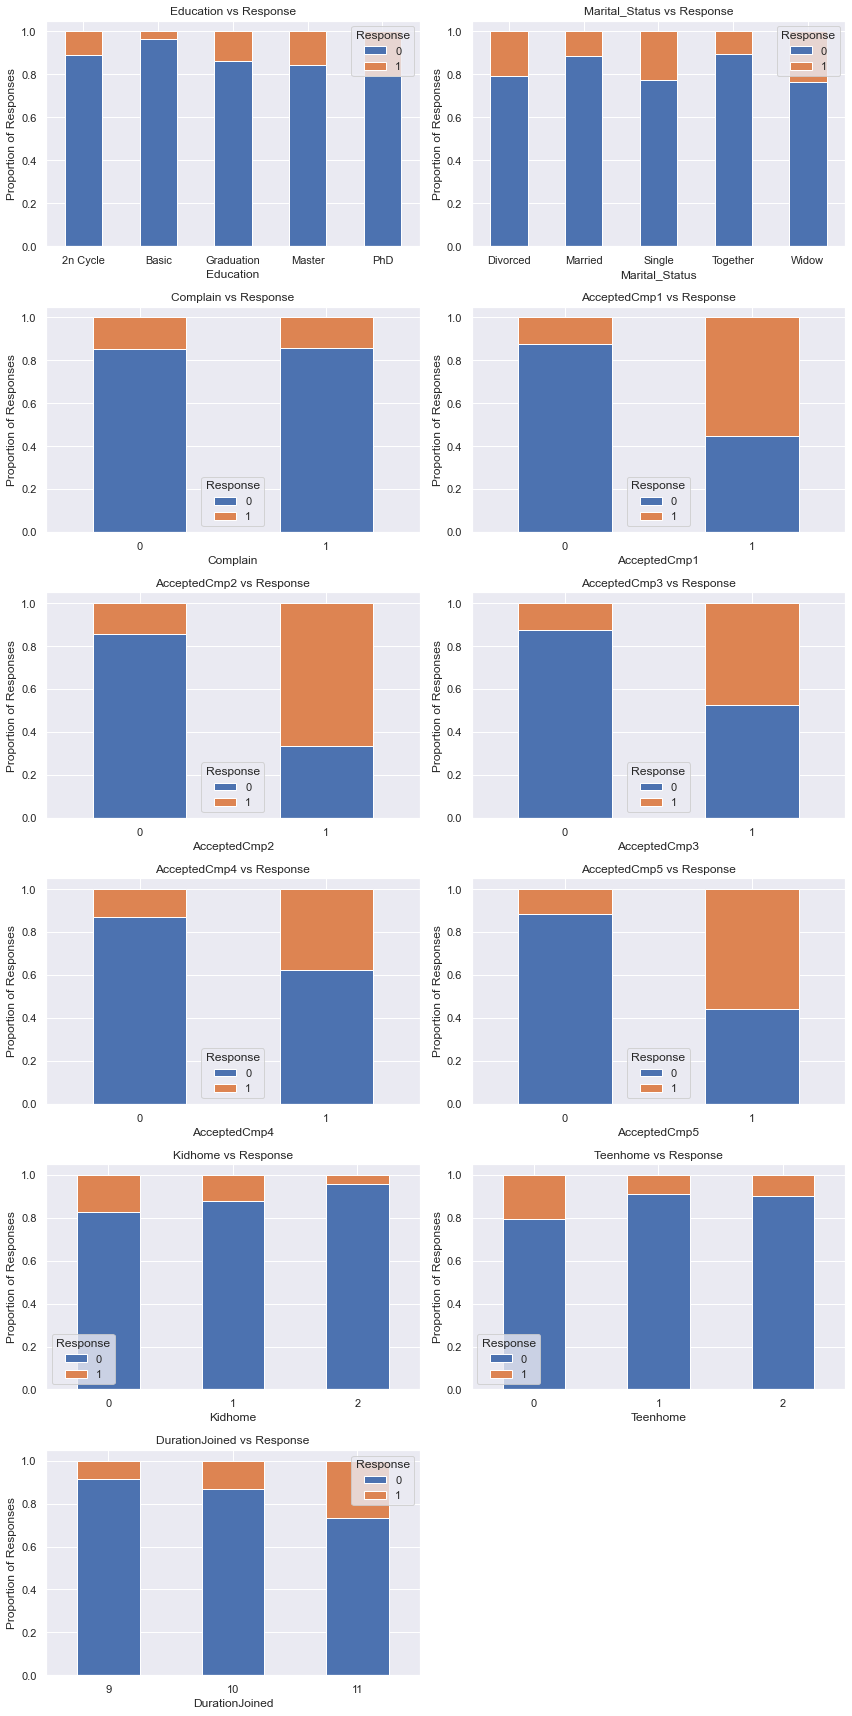

In [36]:
# Determine the number of rows and columns for the subplots
num_cols = 2
num_rows = len(CategoricalCustomerData.columns) // num_cols
if len(CategoricalCustomerData.columns) % num_cols != 0:
    num_rows += 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 24))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterate over the categorical variables and plot each normalized contingency table on a separate subplot
for i, col in enumerate(CategoricalCustomerData.columns):
    
    # Create a normalized contingency table of the column and the "Response" variable
    contingency_table = pd.crosstab(CategoricalCustomerData[col], Response["Response"], normalize='index')
    
    # Plot the bar graph on the appropriate subplot, using red and green for "No" and "Yes" responses
    contingency_table.plot(kind='bar', ax=axs[i],stacked=True)
    
    # Set the title and labels for the subplot
    axs[i].set_title(f"{col} vs Response")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Proportion of Responses")
    
    # Rotate the x-axis labels if necessary
    axs[i].tick_params(axis='x', rotation=0)
    

# If the number of columns is odd, hide the last subplot
if len(CategoricalCustomerData.columns) % num_cols != 0:
    axs[-1].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()



### <font color = pink> Splitting DataSet into People(6), Products(6), Promotion(6), Place(3)
    For People DF: Dropped Year_Birth because from the EDA(plotting boxplots of var against response), there was no obvious/significant correlation between Year birth and response. There is only a very slight difference in the median pf year_birth for response = 0 and response = 1.
    
    For Place DF: Dropped NumWebVisitsMonth as there is no obvious correlation. The median for the variable for response =0 and response = 1 seems to be the same. 

In [37]:
People = pd.DataFrame(CustomerData[["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "DurationJoined", "Response"]])
People.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Response
0,Graduation,Single,58138.0,0,0,11,1
1,Graduation,Single,46344.0,1,1,9,0
2,Graduation,Together,71613.0,0,0,10,0
3,Graduation,Together,26646.0,1,0,9,0
4,PhD,Married,58293.0,1,0,9,0


In [38]:
People.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2212 non-null   object 
 1   Marital_Status  2212 non-null   object 
 2   Income          2212 non-null   float64
 3   Kidhome         2212 non-null   int64  
 4   Teenhome        2212 non-null   int64  
 5   DurationJoined  2212 non-null   int64  
 6   Response        2212 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 202.8+ KB


In [39]:
Products = pd.DataFrame(CustomerData[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds", "Response"]])
Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2212 non-null   int64
 1   MntFruits         2212 non-null   int64
 2   MntMeatProducts   2212 non-null   int64
 3   MntFishProducts   2212 non-null   int64
 4   MntSweetProducts  2212 non-null   int64
 5   MntGoldProds      2212 non-null   int64
 6   Response          2212 non-null   int64
dtypes: int64(7)
memory usage: 202.8 KB


In [40]:
Promotion = pd.DataFrame(CustomerData[["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]])
Promotion.head()
Promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   NumDealsPurchases  2212 non-null   int64
 1   AcceptedCmp1       2212 non-null   int64
 2   AcceptedCmp2       2212 non-null   int64
 3   AcceptedCmp3       2212 non-null   int64
 4   AcceptedCmp4       2212 non-null   int64
 5   AcceptedCmp5       2212 non-null   int64
 6   Response           2212 non-null   int64
dtypes: int64(7)
memory usage: 202.8 KB


In [41]:
Place = pd.DataFrame(CustomerData[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "Response"]])
Place.head()
Place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumWebPurchases      2212 non-null   int64
 1   NumCatalogPurchases  2212 non-null   int64
 2   NumStorePurchases    2212 non-null   int64
 3   Response             2212 non-null   int64
dtypes: int64(4)
memory usage: 150.9 KB


# Random Forest

In [42]:
CategoricalCustomerData

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Kidhome,Teenhome,DurationJoined
0,Graduation,Single,0,0,0,0,0,0,0,0,11
1,Graduation,Single,0,0,0,0,0,0,1,1,9
2,Graduation,Together,0,0,0,0,0,0,0,0,10
3,Graduation,Together,0,0,0,0,0,0,1,0,9
4,PhD,Married,0,0,0,0,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0,0,0,0,0,0,0,1,10
2236,PhD,Together,0,1,0,0,0,0,2,1,9
2237,Graduation,Divorced,0,0,0,0,1,0,0,0,9
2238,Master,Together,0,0,0,0,0,0,0,1,9


In [43]:
print(CustomerData['Education'].value_counts())

Graduation    1115
PhD            479
Master         364
2n Cycle       200
Basic           54
Name: Education, dtype: int64


# Label encoding for Education
### Basic is 1, Graduation is 2, combine 2n Cycle and Master as 3, PhD as 4

In [44]:
# Define label mapping
mapping = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3,'Master': 3,'PhD': 4}

# Map labels to DataFrame column
CustomerData['Education_encoded'] = CustomerData['Education'].map(mapping)

# Print encoded data
print(CustomerData['Education_encoded'])

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education_encoded, Length: 2212, dtype: int64


In [45]:
People = pd.DataFrame(CustomerData[["Education_encoded", "Marital_Status", "Income", "Kidhome", "Teenhome", "DurationJoined", "Response"]])
People.head()

,Education_encoded,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Response
0,2,Single,58138.0,0,0,11,1
1,2,Single,46344.0,1,1,9,0
2,2,Together,71613.0,0,0,10,0
3,2,Together,26646.0,1,0,9,0
4,4,Married,58293.0,1,0,9,0


# OneHotEncoding Marital Status

In [46]:
one_hot_data = pd.get_dummies(CustomerData['Marital_Status'])
one_hot_data

,Divorced,Married,Single,Together,Widow
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
2235,0,1,0,0,0
2236,0,0,0,1,0
2237,1,0,0,0,0
2238,0,0,0,1,0


In [47]:
People = pd.DataFrame(CustomerData[["Education_encoded", "Income", "Kidhome", "Teenhome", "DurationJoined", "Response"]])
People = pd.concat([People, one_hot_data], sort = False, axis = 1).reindex(index=People.index)
People

,Education_encoded,Income,Kidhome,Teenhome,DurationJoined,Response,Divorced,Married,Single,Together,Widow
0,2,58138.0,0,0,11,1,0,0,1,0,0
1,2,46344.0,1,1,9,0,0,0,1,0,0
2,2,71613.0,0,0,10,0,0,0,0,1,0
3,2,26646.0,1,0,9,0,0,0,0,1,0
4,4,58293.0,1,0,9,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,10,0,0,1,0,0,0
2236,4,64014.0,2,1,9,0,0,0,0,1,0
2237,2,56981.0,0,0,9,0,1,0,0,0,0
2238,3,69245.0,0,1,9,0,0,0,0,1,0


# Running Random Forest algorithm 

In [48]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(People['Response'])
X = pd.DataFrame(People.drop('Response', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [49]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each treey = pd.DataFrame(People['Response'])
X = pd.DataFrame(People.drop('Response', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.Response.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8572351421188631

TPR Train :	 0.07172995780590717
TNR Train :	 0.9992372234935164

FPR Train :	 0.0007627765064836003
FNR Train :	 0.9282700421940928


<AxesSubplot:>

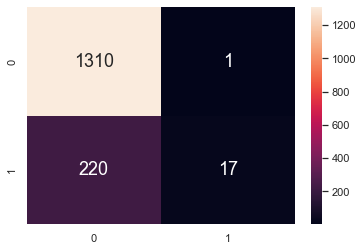

In [50]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8644578313253012

TPR Test :	 0.05319148936170213
TNR Test :	 0.9982456140350877

FPR Test :	 0.0017543859649122807
FNR Test :	 0.9468085106382979


<AxesSubplot:>

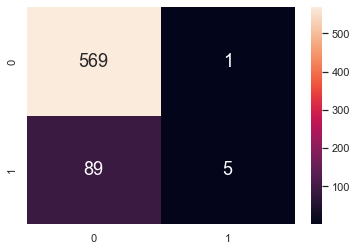

In [51]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Define rf_evaluate function

In [52]:
def rf_evaluate(df,n_estimators,max_depth):
    y = pd.DataFrame(df['Response'])
    X = pd.DataFrame(df.drop('Response', axis = 1))

# Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators=n_estimators,  # n_estimators denote number of trees
                                 max_depth=max_depth)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.Response.ravel())
    

    # Predict the Response corresponding to Predictors
    y_test_pred = rforest.predict(X_test)

    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", rforest.score(X_test, y_test))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8614457831325302

TPR Test :	 0.05263157894736842
TNR Test :	 0.9964850615114236

FPR Test :	 0.0035149384885764497
FNR Test :	 0.9473684210526315


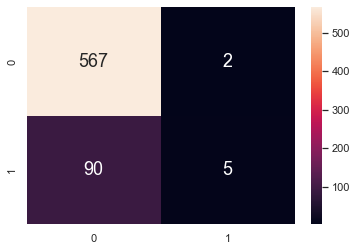

In [53]:
rf_evaluate(People,n_estimators=100,max_depth=4)

Test Data
Accuracy  :	 0.8644578313253012

TPR Test :	 0.07526881720430108
TNR Test :	 0.9929947460595446

FPR Test :	 0.0070052539404553416
FNR Test :	 0.9247311827956989


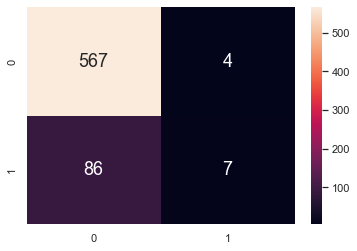

In [54]:
rf_evaluate(Products,n_estimators=100,max_depth=4)

Test Data
Accuracy  :	 0.8614457831325302

TPR Test :	 0.1702127659574468
TNR Test :	 0.9754385964912281

FPR Test :	 0.02456140350877193
FNR Test :	 0.8297872340425532


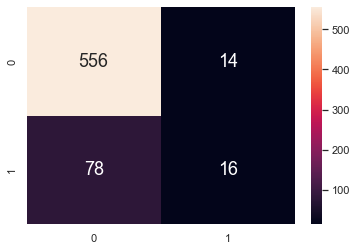

In [55]:
rf_evaluate(Promotion,n_estimators=100,max_depth=4)

Test Data
Accuracy  :	 0.8433734939759037

TPR Test :	 0.018867924528301886
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.9811320754716981


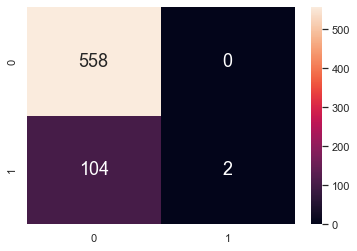

In [56]:
rf_evaluate(Place,n_estimators=100,max_depth=4)

# Cross Validation 

### Grid search 

In [87]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(People['Response'])
X = pd.DataFrame(People.drop('Response', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [81]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1000,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 10)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Response.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
             scoring='accuracy')

In [82]:
print("Best Hyperparameters:", hpGrid.best_params_)
print(np.abs(hpGrid.best_score_))

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 500}
0.865628980060549


Test Data
Accuracy  :	 0.8689759036144579

TPR Test :	 0.11235955056179775
TNR Test :	 0.9860869565217392

FPR Test :	 0.01391304347826087
FNR Test :	 0.8876404494382022


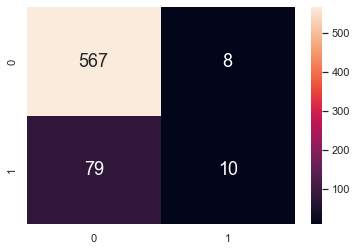

In [88]:
rf_evaluate(People,n_estimators=500,max_depth=7)

In [97]:
rf = RandomForestClassifier(n_estimators=500,  # n_estimators denote number of trees
                                 max_depth=7)       # set the maximum depth of each tree

rf.fit(X, y.Response.ravel())

# Get feature importances
importances = rf.feature_importances_

# Create dataframe of feature importances
df_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

# Select top 5 features with highest importances
top_features = df_imp['Feature'][:5].values

# Get samples where prediction is 1
positive_samples = X[y == 1]

df_imp

# Select rows where top features have highest values
#selected_samples = positive_samples.sort_values(by=top_features, ascending=False)[:10]

# Print selected samples
#print(selected_samples)

,Feature,Importance
1,Income,0.502080
4,DurationJoined,0.141441
0,Education_encoded,0.084933
3,Teenhome,0.080765
2,Kidhome,0.048552
7,Single,0.039554
5,Divorced,0.030248
8,Together,0.029427
6,Married,0.026958
9,Widow,0.016042


In [94]:
X

,Education_encoded,Income,Kidhome,Teenhome,DurationJoined,Divorced,Married,Single,Together,Widow
0,2,58138.0,0,0,11,0,0,1,0,0
1,2,46344.0,1,1,9,0,0,1,0,0
2,2,71613.0,0,0,10,0,0,0,1,0
3,2,26646.0,1,0,9,0,0,0,1,0
4,4,58293.0,1,0,9,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,10,0,1,0,0,0
2236,4,64014.0,2,1,9,0,0,0,1,0
2237,2,56981.0,0,0,9,1,0,0,0,0
2238,3,69245.0,0,1,9,0,0,0,1,0



### Randomized search  

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid to search
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [5, 10, 15, 20],
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 10)
}

# Create the Random Forest object
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object and fit on the data
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
rf_random.fit(X_train, y_train.Response.ravel())

# Print the best hyperparameters
print("Best Hyperparameters: ", rf_random.best_params_)

Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 15}


Test Data
Accuracy  :	 0.8448795180722891

TPR Test :	 0.12264150943396226
TNR Test :	 0.982078853046595

FPR Test :	 0.017921146953405017
FNR Test :	 0.8773584905660378


<AxesSubplot:>

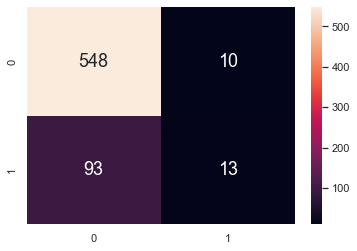

In [86]:

    rforest = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=7, min_samples_leaf=6)
    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.Response.ravel())
    

    # Predict the Response corresponding to Predictors
    y_test_pred = rforest.predict(X_test)

    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", rforest.score(X_test, y_test))
    print()

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

    # Plot the two-way Confusion Matrix
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})